# Question 1

This script visualises the rectangular and triangular pulse functions and their
derivatives, and compares the rate at which the sidelobes of their discrete 
Fourier transforms fall off.

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.fft import fft, fftfreq

from config import A1_ROOT, SAVEFIG_CONFIG

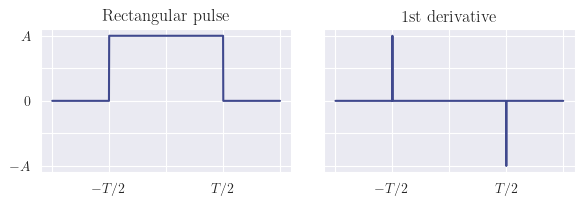

In [3]:
# Plot rectangular pulse and first derivative
t = np.linspace(-1, 1, 1001)

fig, axs = plt.subplots(1, 2, figsize=(6, 2), sharey=True)
fig.tight_layout()

# Rectangular pulse
sns.lineplot(x=t, y=(np.abs(t)<=0.5), ax=axs[0])

# 1st derivative
sns.lineplot(x=t, y=(-np.sign(t)*(np.abs(t)==0.5)), ax=axs[1])

# Axis labelling
axs[0].set_title("Rectangular pulse")
axs[1].set_title("1st derivative")
for i in range(2):
    axs[i].set_xticks(np.linspace(-1, 1, 5))
    axs[i].set_xticklabels(["", "$-T/2$", "", "$T/2$", ""])
    axs[i].set_yticks(np.linspace(-1, 1, 5))
    axs[i].set_yticklabels([])
axs[0].set_yticklabels(["$-A$", "", 0, "", "$A$"])

fname = Path(A1_ROOT, "output", "q1_rectangular.png")
fig.savefig(fname, **SAVEFIG_CONFIG)

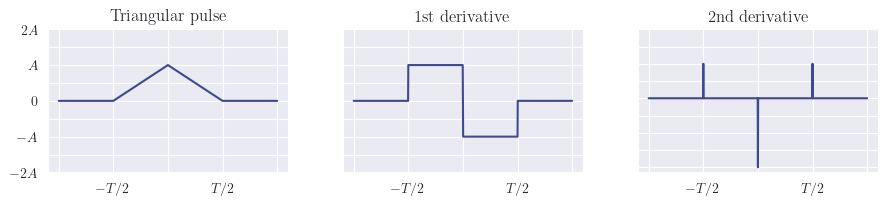

In [7]:
# Plot triangular pulse and first and second derivatives
t = np.linspace(-1, 1, 1001)

fig, axs = plt.subplots(1, 3, figsize=(9, 2), sharey=True)
fig.tight_layout()

# Triangular pulse
sns.lineplot(x=t, y=((1-2*np.abs(t))*(np.abs(t)<=0.5)), ax=axs[0])

# 1st derivative
sns.lineplot(x=t, y=(-np.sign(t)*(np.abs(t)<=0.5)), ax=axs[1])

# 2nd derivative
ddy = np.zeros(t.shape); ddy[np.abs(t)==0.5] = 1; ddy[t==0] = -2
sns.lineplot(x=t, y=ddy, ax=axs[2])

# Axis labelling
axs[0].set_title("Triangular pulse")
axs[1].set_title("1st derivative")
axs[2].set_title("2nd derivative")
for i in range(3):
    axs[i].set_xticks(np.linspace(-1, 1, 5))
    axs[i].set_xticklabels(["", "$-T/2$", "", "$T/2$", ""])
    axs[i].set_yticks(np.linspace(-2, 2, 9))
    axs[i].set_yticklabels([])
axs[0].set_yticklabels(["$-2A$", "", "$-A$", "", 0, "", "$A$", "", "$2A$"])

fname = Path(A1_ROOT, "output", "q1_triangular.png")
fig.savefig(fname, **SAVEFIG_CONFIG)

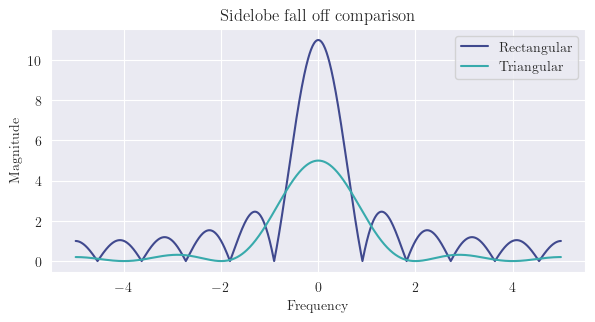

In [9]:
# Comparison of discrete Fourier transforms (using FFT)
t = np.linspace(-50, 50, 1001)
f = fftfreq(1001, 0.1)

# Create rectangular/triangular pulses of amplitude A and width T on t
rect_pulse = lambda t, A, T: A * (np.abs(t) <= T / 2)
tria_pulse = lambda t, A, T: A * (1 - 2 * np.abs(t) / T) * (np.abs(t) <= T / 2)

H_rect = np.abs(fft(rect_pulse(t, 1, 1)))
H_tria = np.abs(fft(tria_pulse(t, 1, 1)))

fig, ax = plt.subplots(figsize=(6, 3))
fig.tight_layout()

sns.lineplot(x=f, y=H_rect, ax=ax, label="Rectangular")
sns.lineplot(x=f, y=H_tria, ax=ax, label="Triangular")

ax.set_title("Sidelobe fall off comparison")
ax.set_xlabel("Frequency")
ax.set_ylabel("Magnitude")

fname = Path(A1_ROOT, "output", "q1_sidelobes.png")
fig.savefig(fname, **SAVEFIG_CONFIG)